In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
n=10

In [3]:
many_matrix=[]
many_conds=[]
many_b=[]
many_results_x=[]
i=0
cond=1
while cond!=10**12:
    result_x=np.random.sample(n).reshape(-1, 1)
    lambda1=1
    lambda2=cond
    lambda_n=random.uniform(1,cond)
    u=np.full(n-2,lambda_n)
    v=np.concatenate((np.array([lambda1,cond]),u))
    D=np.diag(v)
    T=np.tri(n)
    G=np.diag(np.ones(n))
    B=T+D-G
    E=np.eye(n)
    w=np.random.sample(n)
    Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2
    A=np.dot(np.linalg.inv(Q),B)
    A=np.dot(A, Q)
    b=np.dot(A,result_x)
    many_conds.append(cond)
    many_matrix.append(A)
    many_results_x.append(result_x)
    many_b.append(b)
    i+=1
    cond=10**i

In [4]:
Z=np.zeros((n,n))
def QR_decomposition(C,B):
    R=np.zeros((n,n))
    B[0:,0]=C[0:,0]
    B[0:,0]=B[0:,0]/np.linalg.norm(B[0:,0])
    for i in range(1,n):
        B[0:,i]=C[0:,i]
        for j in range(i):
            B[0:,i]-=np.dot(np.dot(C[0:,i],B[0:,j])/np.dot(B[0:,j],B[0:,j]),B[0:,j])
        B[0:,i]=B[0:,i]/np.linalg.norm(B[0:,i])
    for i in range(n):
        for j in range(i,n):
            R[i,j]+=np.dot(B[0:,i],C[0:,j])
    composite_matrix=np.hstack([R,E])
    j=n-1
    while j>=0:
        composite_matrix[j,j:]=composite_matrix[j,j:]/composite_matrix[j,j]
        i=j-1
        while i>=0:
            composite_matrix[i,j:]=composite_matrix[i,j:]-composite_matrix[j,j:]*composite_matrix[i,j]
            i-=1
        j-=1
    inv_R=composite_matrix[0:,n:]
    return [inv_R,B]

In [5]:
f=list(range(0,12))
many_num_x=[np.dot(QR_decomposition(many_matrix[i],Z)[0],np.transpose(QR_decomposition(many_matrix[i],Z)[1])) for i in f]
many_num_x=[np.dot(many_num_x[i],many_b[i]) for i in f]
many_errors=[np.linalg.norm(many_num_x[i]-many_results_x[i],2) for i in f]
many_nevazka=[np.linalg.norm(np.dot(many_matrix[i],many_num_x[i])-many_b[i],2) for i in f]

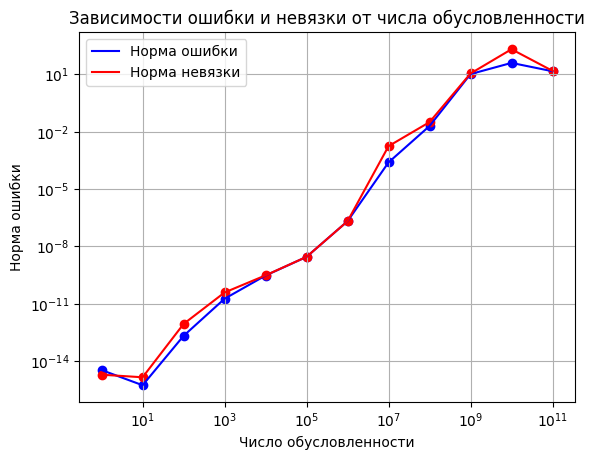

In [6]:
plt.loglog(many_conds,many_errors,color='blue',label='Норма ошибки')
plt.scatter(many_conds,many_errors,color='blue')
plt.loglog(many_conds,many_nevazka,color='red',label='Норма невязки')
plt.scatter(many_conds,many_nevazka,color='red')
plt.legend()
plt.xlabel('Число обусловленности')
plt.ylabel('Норма ошибки')
plt.title('Зависимости ошибки и невязки от числа обусловленности')
plt.grid('True')
plt.show()